# Deep Learning Homework 1
# Author: Shivam Pathak
# Date: 09/08/2025
# Description: This script implements a simple neural network with one hidden layer to solve a small dataset problem.


In [34]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import sys

# The Given Small Dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [1]])

# Sigmoid Activation Function

100%|██████████| 10000/10000 [00:00<00:00, 37449.11it/s]

Predictions: [0.139 0.923 0.923 0.983]
Targets: [0 1 1 1]


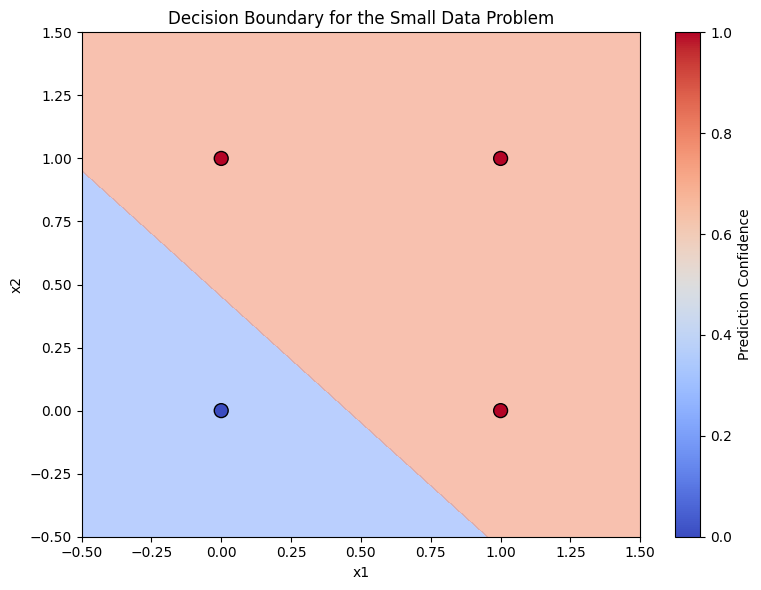

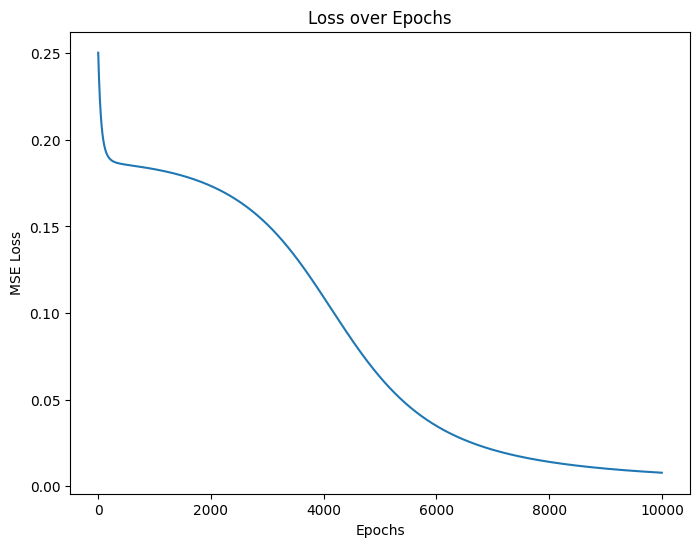

In [ ]:
# Part 2
# Sigmoid Activation Function
def sigmoid(x):
    '''
    This function actually compute sigmoid over input, x

    Inputs: 
        x: input data
    Returns:
        returns sigmoid of x
    '''
    return 1 / (1 + np.exp(-x))


# Initialize weights for visualization
# Please note the dimensions and data types of both weights between input and hidden layer, and
#  between hidden layer and output layer
np.random.seed(42)
hidden_size = 2
input_size = 2
output_size = 1

W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))


# Forward Propagation (for visualization)
def forward_propagation(X, W1, b1, W2, b2):
    '''
    This function computes forward propagation of the input X through the network.
    Inputs:
        X: input,
        W1: weights between input and hidden layer
        b1: bias weights between input and hidden layer.
        W2: weights between hidden layer and output layer
        b2: bias weights between hidden layer and output layer.

    Returns:
        Z1: net weighted sum at hidden layer neurons
        A1: activated outputs by the hidden layer neurons
        Z2: net weighted sum at output layer neuron
        A2: activated output by the output layer neuron.
    '''
    n = X.shape[0] #num of samples

    Z1 = np.zeros((n,hidden_size))
    A1 = np.zeros((n,hidden_size))
    Z2 = np.zeros((n,output_size))
    A2 = np.zeros((n,output_size))

    #@TODO: Your code begins here...
    # Hidden Layer 
    Z1 = np.dot(X, W1) + b1 # shaping (n, hidden_size)
    A1 = sigmoid(Z1) # activation
    #Output Layer
    Z2 = np.dot(A1, W2) + b2 # shaping (n, output_size)
    A2 = sigmoid(Z2) # final prediction




    return Z1, A1, Z2, A2

def backward(Z1, A1, Z2, A2, Y):
    '''
    This function computes derivatives of the error, E with respect to all the weights given the predicted outputs from a forward pass and 
      the corresponding target outputs.
    
    Inputs: 
        Z1: net weighted sum at hidden layer neurons
        A1: activated outputs by the hidden layer neurons
        Z2: net weighted sum at output layer neuron
        A2: activated output by the output layer neuron.
        Y: the target/ground true outputs for the inputs.
    
    Returns:
        dW1: derivative of error, E with respect to W1
        db1: derivative of error, E with respect to b1
        dW2: derivative of error, E with respect to W2
        db2: derivative of error, E with respect to b2
    '''
    m = X.shape[1] #number of features per sample

    dW1 = np.zeros((m,hidden_size))
    db1 = np.zeros((1,hidden_size))
    dW2 = np.zeros((hidden_size,output_size))
    db2 = np.zeros((1,output_size))
    
    #@TODO: Your code begins here...
    m = Y.shape[0] # number of samples
    # Output layer error 
    dZ2 = (A2 - Y) * (A2 * (1 - A2)) # derivative of loss w.r.t Z2
    dW2 = (A1.T @ dZ2) / m  # average over all samples
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m # average over all samples

    # hidden layer error
    dZ1 = (dZ2 @ W2.T) * (A1 * (1 - A1)) # derivative of loss w.r.t Z1
    dW1 = (X.T @ dZ1) / m # average over all samples
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m # average over all samples


    return dW1, db1, dW2, db2


def update_weights(W1, b1, W2, b2, dW1, db1, dW2, db2):
    '''
    This function updates given weights based on the derivatives of the error with respect to each weights. This is part of the gradient descent based optimization.

    Inputs:
        W1: weights between input and hidden layer
        b1: bias weights between input and hidden layer.
        W2: weights between hidden layer and output layer
        b2: bias weights between hidden layer and output layer.
        dW1: derivative of error, E with respect to W1
        db1: derivative of error, E with respect to b1
        dW2: derivative of error, E with respect to W2
        db2: derivative of error, E with respect to b2

    Returns:
        W1: updated weights between input and hidden layer
        b1: updated bias weights between input and hidden layer.
        W2: updated weights between hidden layer and output layer
        b2: updated bias weights between hidden layer and output layer.

    '''
    #@TODO: Your code begins here...
    W1 -= learning_rate * dW1 # update rules
    b1 -= learning_rate * db1 
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    


    return W1, b1, W2, b2

# The training loop for visualization
learning_rate = 0.1
epochs = 10000
losses = []

for epoch in tqdm(range(epochs)):
    # Forward propagation
    Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)

    # Compute loss (Mean Squared Error)
    loss = np.mean((Y - A2) ** 2)
    losses.append(loss)
    
    # Backward propagation
    #dW1, db1, dW2, db2 = backward(Z1, A1, Z2, A2, Y)
    dW1, db1, dW2, db2 = backward(X, Z1, A1, Z2, A2, Y, W2)
    # Update parameters
    W1, b1, W2, b2 = update_weights(W1, b1, W2, b2, dW1, db1, dW2, db2)
    

# Generate a grid of points to visualize decision boundary
x1 = np.linspace(-0.5, 1.5, 100)
x2 = np.linspace(-0.5, 1.5, 100)
xx1, xx2 = np.meshgrid(x1, x2)
grid = np.c_[xx1.ravel(), xx2.ravel()]

# Predict on the grid
_, _, _, Y_pred = forward_propagation(grid, W1, b1, W2, b2)
Y_pred = Y_pred.reshape(xx1.shape)

# After training
_, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
print("Predictions:", np.round(A2.ravel(), 3), flush=True)
print("Targets:", Y.ravel(), flush=True)
sys.stdout.flush()

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx1, xx2, Y_pred, levels=[0, 0.5, 1], alpha=0.6, cmap="coolwarm")
plt.scatter(X[:, 0], X[:, 1], c=Y.ravel(), edgecolors="k", cmap="coolwarm", s=100)
plt.title("Decision Boundary for the Small Data Problem")
plt.xlabel("x1")
plt.ylabel("x2")
plt.colorbar(label="Prediction Confidence")
plt.tight_layout()
plt.show()


# @TODO: Please draw epoch-loss plot here...
plt.figure(figsize=(8, 6))
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()


[Run] hidden=2, lr=0.01, epochs=5000
Final loss: 0.166266
Predictions: [0.712 0.761 0.761 0.79 ]
Targets    : [0 1 1 1]

[Run] hidden=2, lr=0.1, epochs=5000
Final loss: 0.012103
Predictions: [0.176 0.909 0.909 0.97 ]
Targets    : [0 1 1 1]

[Run] hidden=2, lr=0.5, epochs=5000
Final loss: 0.001191
Predictions: [0.055 0.971 0.971 0.992]
Targets    : [0 1 1 1]


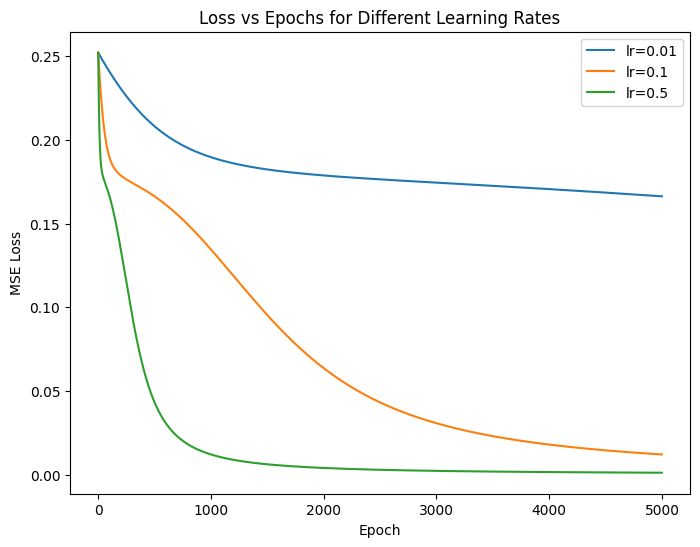

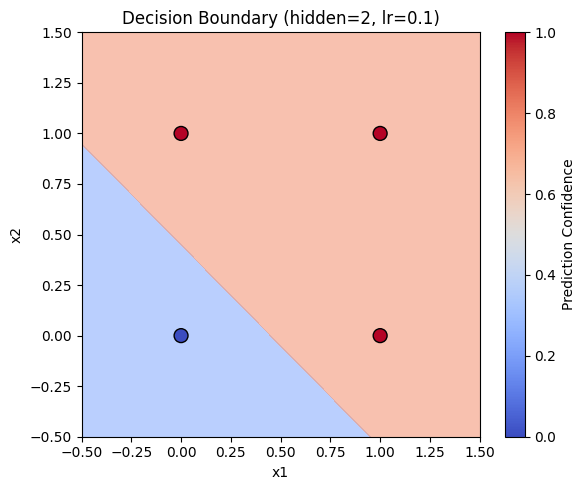

ValueError: non-broadcastable output operand with shape (2,1) doesn't match the broadcast shape (2,2)

<Figure size 800x600 with 0 Axes>

In [ ]:
# PART 3: EXPERIMENTS 
def train_nn(hidden_size=2, learning_rate=0.1, epochs=5000, seed=42, verbose=True):
    # Reinitialize params for a clean run
    rng = np.random.default_rng(seed)
    input_size, output_size = 2, 1
    W1 = rng.normal(0, 0.01, size=(input_size, hidden_size))
    b1 = np.zeros((1, hidden_size))
    W2 = rng.normal(0, 0.01, size=(hidden_size, output_size))
    b2 = np.zeros((1, output_size))

    losses = []
    for _ in range(epochs):
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
        loss = np.mean((Y - A2) ** 2)
        losses.append(loss)
        dW1, db1, dW2, db2 = backward(X, Z1, A1, Z2, A2, Y, W2)

        # manual updates using the experiment's learning_rate
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

    if verbose:
        print(f"\n[Run] hidden={hidden_size}, lr={learning_rate}, epochs={epochs}")
        print("Final loss:", round(losses[-1], 6))
        _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
        print("Predictions:", np.round(A2.ravel(), 3))
        print("Targets    :", Y.ravel())
    return W1, b1, W2, b2, losses

def plot_decision_boundary(W1, b1, W2, b2, title):
    x1 = np.linspace(-0.5, 1.5, 100)
    x2 = np.linspace(-0.5, 1.5, 100)
    xx1, xx2 = np.meshgrid(x1, x2)
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    _, _, _, Yg = forward_propagation(grid, W1, b1, W2, b2)
    Yg = Yg.reshape(xx1.shape)

    plt.figure(figsize=(6,5))
    plt.contourf(xx1, xx2, Yg, levels=[0, 0.5, 1], alpha=0.6, cmap="coolwarm")
    plt.scatter(X[:,0], X[:,1], c=Y.ravel(), edgecolors="k", cmap="coolwarm", s=100)
    plt.title(title); plt.xlabel("x1"); plt.ylabel("x2")
    plt.colorbar(label="Prediction Confidence")
    plt.tight_layout()
    plt.show()


# --- 3A. Learning-rate sweep ---
lrs = [0.01, 0.1, 0.5]
plt.figure(figsize=(8,6))
for lr in lrs:
    _, _, _, _, losses_lr = train_nn(hidden_size=2, learning_rate=lr, epochs=5000, verbose=True)
    plt.plot(losses_lr, label=f"lr={lr}")
plt.title("Loss vs Epochs for Different Learning Rates")
plt.xlabel("Epoch"); plt.ylabel("MSE Loss"); plt.legend(); plt.show()

# show a boundary from one LR run (pick the middle one)
W1e, b1e, W2e, b2e, _ = train_nn(hidden_size=2, learning_rate=0.1, epochs=5000, verbose=False)
plot_decision_boundary(W1e, b1e, W2e, b2e, "Decision Boundary (hidden=2, lr=0.1)")

# --- 3B. Hidden-size sweep ---
hs = [1, 2, 5, 10]
plt.figure(figsize=(8,6))
for h in hs:
    _, _, _, _, losses_h = train_nn(hidden_size=h, learning_rate=0.1, epochs=5000, verbose=True)
    plt.plot(losses_h, label=f"hidden={h}")
plt.title("Loss vs Epochs for Different Hidden Sizes")
plt.xlabel("Epoch"); plt.ylabel("MSE Loss"); plt.legend(); plt.show()

# show boundaries for a couple of sizes
for h in [1, 5]:
    W1h, b1h, W2h, b2h, _ = train_nn(hidden_size=h, learning_rate=0.1, epochs=5000, verbose=False)
    plot_decision_boundary(W1h, b1h, W2h, b2h, f"Decision Boundary (hidden={h}, lr=0.1)")
